# 题目
Compute the multivariate mean vector.

Compute the sample covariance matrix as inner products between the columns of thecentered data matrix.

Compute the sample covariance matrix as outer product between the centered datapoints.

Compute the correlation between Attributes 1 and 2 by computing the cosine of the anglebetween the centered attribute vectors. Plot the scatter plot between these two attributes.

Assuming that Attribute 1 is normally distributed, plot its probability density functions.

Which attribute has the largest variance, and which attribute has the smallest variance?Print these values.

Which pair of attributes has the largest covariance, and which pair of attributes has thesmallest covariance? Print these values.

# 读取并查看数据
查阅数据信息得知，数据集共11种属性，前10为数字，11为标记。
 1.  fLength:  continuous  # major axis of ellipse [mm]
 2.  fWidth:   continuous  # minor axis of ellipse [mm] 
 3.  fSize:    continuous  # 10-log of sum of content of all pixels [in #phot]
 4.  fConc:    continuous  # ratio of sum of two highest pixels over fSize  [ratio]
 5.  fConc1:   continuous  # ratio of highest pixel over fSize  [ratio]
 6.  fAsym:    continuous  # distance from highest pixel to center, projected onto major axis [mm]
 7.  fM3Long:  continuous  # 3rd root of third moment along major axis  [mm] 
 8.  fM3Trans: continuous  # 3rd root of third moment along minor axis  [mm]
 9.  fAlpha:   continuous  # angle of major axis with vector to origin [deg]
 10.  fDist:    continuous  # distance from origin to center of ellipse [mm]
 11.  class:    g,h         # gamma (signal), hadron (background)
原数据没有列标题，为其加上列名

In [1]:
import numpy as np
import pandas as pd

filepath = "C:\\Users\\Shinelon\\Desktop\\data-mining  project\\Project1\\magic04.data"
df = pd.read_csv(filepath,header=None , names = ['fLength','fWidth','fSize','fConc',' fConc1',
                                 'fAsym','fM3Long','fM3Trans','fAlpha','fDist','class'])
print(df)


        fLength    fWidth   fSize   fConc   fConc1     fAsym   fM3Long  \
0       28.7967   16.0021  2.6449  0.3918   0.1982   27.7004   22.0110   
1       31.6036   11.7235  2.5185  0.5303   0.3773   26.2722   23.8238   
2      162.0520  136.0310  4.0612  0.0374   0.0187  116.7410  -64.8580   
3       23.8172    9.5728  2.3385  0.6147   0.3922   27.2107   -6.4633   
4       75.1362   30.9205  3.1611  0.3168   0.1832   -5.5277   28.5525   
...         ...       ...     ...     ...      ...       ...       ...   
19015   21.3846   10.9170  2.6161  0.5857   0.3934   15.2618   11.5245   
19016   28.9452    6.7020  2.2672  0.5351   0.2784   37.0816   13.1853   
19017   75.4455   47.5305  3.4483  0.1417   0.0549   -9.3561   41.0562   
19018  120.5135   76.9018  3.9939  0.0944   0.0683    5.8043  -93.5224   
19019  187.1814   53.0014  3.2093  0.2876   0.1539 -167.3125 -168.4558   

       fM3Trans   fAlpha     fDist class  
0       -8.2027  40.0920   81.8828     g  
1       -9.9574   6.3609 

# 计算多元均值
df.iloc()用来选取数据前十列
用mean（）函数计算每列均值得到结果
fLength      53.250154
fWidth       22.180966
fSize         2.825017
fConc         0.380327
 fConc1       0.214657
fAsym        -4.331745
fM3Long      10.545545
fM3Trans      0.249726
fAlpha       27.645707
fDist       193.818026

In [49]:
df=df.iloc[:,[0,1,2,3,4,5,6,7,8,9]]  #排除class
m = df.mean(axis = 0)
print(m)

fLength      53.250154
fWidth       22.180966
fSize         2.825017
fConc         0.380327
 fConc1       0.214657
fAsym        -4.331745
fM3Long      10.545545
fM3Trans      0.249726
fAlpha       27.645707
fDist       193.818026
dtype: float64


# 样本协方差矩阵的内积
## 矩阵中性化

将数据减去每列均值得到中心化矩阵，中心化是一个平移过程，平移后所有数据的中心是（0，0）。
![image.png](中心化-1.png)

## 协方差矩阵
协方差的计算公式被定义为

![Image of Yaktocat](https://www.zhihu.com/equation?tex=%5Csigma%5Cleft%28x%2Cy%5Cright%29%3D%5Cfrac%7B1%7D%7Bn-1%7D%5Csum_%7Bi%3D1%7D%5E%7Bn%7D%5Cleft%28x_i-%5Cbar%7Bx%7D%5Cright%29%5Cleft%28y_i-%5Cbar%7By%7D%5Cright%29)
协方差矩阵为
![Image of Yaktocat](https://www.zhihu.com/equation?tex=%5CSigma%3D%5Cleft%5B+%5Cbegin%7Barray%7D%7Bccc%7D%5Csigma%28%7Bx_1%7D%2C%7Bx_1%7D%29+%26+%5Ccdots+%26+%5Csigma%5Cleft%28x_1%2Cx_d%5Cright%29+%5C%5C+%5Cvdots+%26+%5Cddots+%26+%5Cvdots+%5C%5C+%5Csigma%5Cleft%28x_d%2Cx_1%5Cright%29+%26+%5Ccdots+%26+%5Csigma%28%7Bx_d%7D%2C%7Bx_d%7D%29+%5C%5C+%5Cend%7Barray%7D+%5Cright%5D%5Cin%5Cmathbb%7BR%7D%5E%7Bd%5Ctimes+d%7D)
     其中，对角线上的元素为各个随机变量的方差，非对角线上的元素为两两随机变量之间的协方差，根据协方差的定义，我们可以认定：矩阵 ∑ 为对称矩阵(symmetric matrix)，其大小为d×d 。

协方差矩阵计算各维度之间的相关性由于样本特征均值白化后为0，各特征方差一样，计算得到的协方差矩阵，其中元素的值越大，则说明对应下标的特征之间相关性越高。

样本协方差矩阵作为中心点的样本大小所规范化的输入属性向量的成对内积给出

根据课本公式2.30计算协方差矩阵内积
![image.png](2.30.png)

In [50]:
centrdf = df-m   #数据集中心化
print(centrdf)
np.dot(centrdf.T,centrdf)/len(centrdf)

          fLength      fWidth     fSize     fConc    fConc1       fAsym  \
0      -24.453454   -6.178866 -0.180117  0.011473 -0.016457   32.032145   
1      -21.646554  -10.457466 -0.306517  0.149973  0.162643   30.603945   
2      108.801846  113.850034  1.236183 -0.342927 -0.195957  121.072745   
3      -29.432954  -12.608166 -0.486517  0.234373  0.177543   31.542445   
4       21.886046    8.739534  0.336083 -0.063527 -0.031457   -1.195955   
...           ...         ...       ...       ...       ...         ...   
19015  -31.865554  -11.263966 -0.208917  0.205373  0.178743   19.593545   
19016  -24.304954  -15.478966 -0.557817  0.154773  0.063743   41.413345   
19017   22.195346   25.349534  0.623283 -0.238627 -0.159757   -5.024355   
19018   67.263346   54.720834  1.168883 -0.285927 -0.146357   10.136045   
19019  133.931246   30.820434  0.384283 -0.092727 -0.060757 -162.980755   

          fM3Long   fM3Trans     fAlpha       fDist  
0       11.465455  -8.452426  12.446293 -111.

array([[ 1.79468657e+03,  5.98832056e+02,  1.40634899e+01,
        -4.88673783e+00, -2.80023307e+00, -9.24385500e+02,
        -2.58713552e+02,  1.18133866e+01, -9.70630726e+00,
         1.32479447e+03],
       [ 5.98832056e+02,  3.36560086e+02,  6.22077467e+00,
        -2.04502933e+00, -1.17816446e+00, -2.89957100e+02,
        -1.64885064e+02,  1.51852884e+01,  3.16350305e+01,
         4.61761921e+02],
       [ 1.40634899e+01,  6.22077467e+00,  2.23337740e-01,
        -7.35072146e-02, -4.22410108e-02, -4.47284297e+00,
         2.29341395e+00,  1.52113339e-01, -2.30280376e+00,
         1.54346558e+01],
       [-4.88673783e+00, -2.04502933e+00, -7.35072146e-02,
         3.34188897e-02,  1.97252425e-02,  1.21513100e+00,
        -1.13646775e+00, -4.30002400e-02,  1.12267849e+00,
        -4.48542469e+00],
       [-2.80023307e+00, -1.17816446e+00, -4.22410108e-02,
         1.97252425e-02,  1.22119946e-02,  6.55298229e-01,
        -6.69353952e-01, -2.52377277e-02,  6.62872326e-01,
        -2.

# 样本协方差矩阵外积
根据教材公式2.31计算外积
![image.png](2.31.png)
样本协方差矩阵也可以写成作为每个中心点的外积得到的秩1矩阵的和

In [51]:
#np.outer(centrdf.T,centrdf)
# print(centrdf.iloc[i])
# print(centrdf.values)
centrarr = centrdf.values  #转化为np的array
outer = 0
for i in range(len(centrarr)):
    outer = outer +centrarr[i].reshape(len(centrarr[0]),1)*centrarr[i]
    
print(outer/len(centrarr))

[[ 1.79468657e+03  5.98832056e+02  1.40634899e+01 -4.88673783e+00
  -2.80023307e+00 -9.24385500e+02 -2.58713552e+02  1.18133866e+01
  -9.70630726e+00  1.32479447e+03]
 [ 5.98832056e+02  3.36560086e+02  6.22077467e+00 -2.04502933e+00
  -1.17816446e+00 -2.89957100e+02 -1.64885064e+02  1.51852884e+01
   3.16350305e+01  4.61761921e+02]
 [ 1.40634899e+01  6.22077467e+00  2.23337740e-01 -7.35072146e-02
  -4.22410108e-02 -4.47284297e+00  2.29341395e+00  1.52113339e-01
  -2.30280376e+00  1.54346558e+01]
 [-4.88673783e+00 -2.04502933e+00 -7.35072146e-02  3.34188897e-02
   1.97252425e-02  1.21513100e+00 -1.13646775e+00 -4.30002400e-02
   1.12267849e+00 -4.48542469e+00]
 [-2.80023307e+00 -1.17816446e+00 -4.22410108e-02  1.97252425e-02
   1.22119946e-02  6.55298229e-01 -6.69353952e-01 -2.52377277e-02
   6.62872326e-01 -2.51566226e+00]
 [-9.24385500e+02 -2.89957100e+02 -4.47284297e+00  1.21513100e+00
   6.55298229e-01  3.50517348e+03  8.27439241e+02  3.14776536e+00
  -8.60618247e+01 -9.14642631e+02

# 计算属性间相关性与散点图
通过计算居中属性向量之间的角度余弦计算属性1和属性2之间的相关性。

余弦相似度用向量空间中两个向量夹角的余弦值作为衡量两个个体间差异的大小。余弦值越接近1，就表明夹角越接近0度，也就是两个向量越相似，这就叫"余弦相似性"。
![Image of Yaktocat](https://images2018.cnblogs.com/blog/1129576/201803/1129576-20180321205209877-1584135356.png)

通过余弦公式计算，余弦值为0.7705120396837165

可以得出结论：属性1和属性2较为相关

将属性1 flength 作为横坐标
属性2 fWidth 作为纵坐标画出散点图

0.7705120396837165


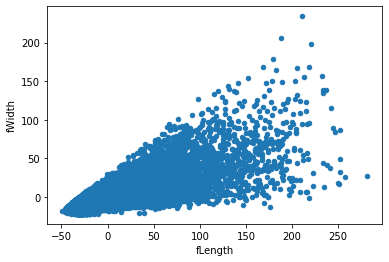

In [59]:
#计算夹角余弦
print(centrarr.T[0].dot(centrarr.T[1])/(np.linalg.norm(centrarr.T[0]) * np.linalg.norm(centrarr.T[1])))
centrdf.plot(x='fLength', y='fWidth', kind='scatter')

# 正态分布概率密度函数
## 概率密度函数
对于一维实随机变量X，设它的累积分布函数是FX(x)。如果存在可测函数fX(x)，满足：

![Image of Yaktocat](https://wiki.mbalib.com/w/images/math/a/8/3/a8309e31abdb0085be755bb1eced19e5.png)
　　那么X是一个连续型随机变量，并且fX(x)是它的概率密度函数。
 ## 正态分布
  正态分布是一种概率分布。正态分布是具有两个参数μ和σ2的连续型随机变量的分布，第一参数μ是遵从正态分布的随机变量的均值，第二个参数σ2是此随机变量的方差，所以正态分布记作N(μ，σ2 )。遵从正态分布的随机变量的概率规律为取 μ邻近的值的概率大 ，而取离μ越远的值的概率越小；σ越小，分布越集中在μ附近，σ越大，分布越分散。正态分布的密度函数的特点是：关于μ对称，在μ处达到最大值，在正（负）无穷远处取值为0，在μ±σ处有拐点。它的形状是中间高两边低 ，图像是一条位于x 轴上方的钟形曲线。当μ＝0，σ2 ＝1时，称为标准正态分布，记为N（0，1）。μ维随机向量具有类似的概率规律时，称此随机向量遵从多维正态分布。
  
  正态分布的主要特征
  
　　1、集中性：正态曲线的高峰位于正中央，即均数所在的位置。

　　2、对称性：正态曲线以均数为中心，左右对称，曲线两端永远不与横轴相交。

　　3、均匀变动性：正态曲线由均数所在处开始，分别向左右两侧逐渐均匀下降。

　　4、正态分布有两个参数，即均数μ和标准差σ，可记作N（μ，σ）：均数μ决定正态曲线的中心位置；标准差σ决定正态曲线的陡峭或扁平程度。σ越小，曲线越陡峭；σ越大，曲线越扁平。

　　5、u变换：为了便于描述和应用，常将正态变量作数据转换。

正态分布的概率密度函数：
![Image of Yaktocat](https://private.codecogs.com/gif.latex?f%28x%29%20%3D%20%5Cfrac%7B1%7D%7B%5Csqrt%7B2%5Cpi%7D%5Csigma%7Dexp%28-%5Cfrac%7B%28x-%5Cmu%29%5E2%29%7D%7B2%5Csigma%20%5E%7B2%7D%7D%29)

53.25015392744498 42.36374123586791


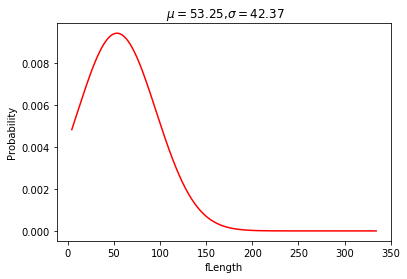

In [71]:
import matplotlib.pyplot as plt
from scipy.stats import norm
x = df.iloc[:,0] #提取第一列的 
mu = np.mean(x) #计算均值 
sigma = np.std(x) 
print(mu,sigma)

y = norm.pdf(bins, mu, sigma)#拟合一条最佳正态分布曲线y 
plt.plot(bins, y, 'r-') #绘制曲线 
plt.xlabel('fLength') 
plt.ylabel('Probability') 
plt.title(r' $\mu=53.25$,$\sigma=42.37$')
plt.show()

# 计算各属性方差
方差是各个数据与其算术平均数的离差平方和的平均数，通常以σ2表示。方差的计量单位和量纲不便于从经济意义上进行解释，所以实际统计工作中多用方差的算术平方根——标准差来测度统计数据的差异程度。
![Image of Yaktocat](https://wiki.mbalib.com/w/images/math/7/6/c/76ca7ca681a12b49e7a410606a4691f9.png)

fConc1方差最小为0.012211994579486615
fDist方差最大为5584.546352841387

In [102]:
d = df.values 
list = []
for i in range(10):
    list.append(np.var(d.T[i]))
print(list)
print("最小方差为" + str(min(list)) + "最大方差为" + str(max(list)))

[1794.6865714995752, 336.56008561159445, 0.223337739867947, 0.03341888966513579, 0.012211994579486615, 3505.1734772218742, 2600.8752860087543, 433.7594064647074, 681.3631783542794, 5584.546352841387]
最小方差为0.012211994579486615最大方差为5584.546352841387


# 计算属性间的协方差
协方差用于衡量两个变量的总体误差。而方差是协方差的一种特殊情况，即当两个变量是相同的情况。
协方差定义为：
![Image of Yaktocat](https://wiki.mbalib.com/w/images/math/5/5/d/55dab8cc069454a52205d8f171828296.png)
如果两个变量的变化趋势一致，也就是说如果其中一个大于自身的期望值，另外一个也大于自身的期望值，那么两个变量之间的协方差就是正值。

如果两个变量的变化趋势相反，即其中一个大于自身的期望值，另外一个却小于自身的期望值，那么两个变量之间的协方差就是负值。

如果X与Y是统计独立的，那么二者之间的协方差就是0。

对于随机变量序列X1, ..., Xn 与 Y1, ..., Ym，有
  
 ![Image of Yaktocat](https://wiki.mbalib.com/w/images/math/a/a/c/aac97b153d8a63d92fd6f14b83b2dc5f.png)
 
遍历每两个属性，求协方差。排序取出最大与最小。

协方差最小的一对属性是:('1&6', -924.4341029748747)即fAsym与fLength

协方差最大的一对属性是:('1&10', 1324.8641308721585)即fDist与fLength

In [124]:
dict = {}
for i in range(9):
    for j in range(i + 1, 10):
        k = str(i + 1) + '&' + str(j + 1)
        dict[k] = np.cov(d.T[i],d.T[j])[0][1]

d_order = sorted(dict.items(),key=lambda x:x[1])
print(d_order)
print("协方差最小的一对属性是:" + str(d_order[0]))
print("协方差最大的一对属性是:" + str(d_order[-1]))




[('1&6', -924.4341029748747), ('6&10', -914.6907215651297), ('9&10', -430.25324691056437), ('2&6', -289.97234586739484), ('1&7', -258.72715463806395), ('7&9', -247.98507999659464), ('2&7', -164.8937339268676), ('6&9', -86.06634976218909), ('7&8', -18.26636058908067), ('1&9', -9.70681761115193), ('1&4', -4.88699477113083), ('4&10', -4.485660533859183), ('3&6', -4.47307814581009), ('1&5', -2.8003803018246467), ('5&10', -2.5157945329350415), ('3&9', -2.302924838678903), ('2&4', -2.045136852452629), ('2&5', -1.1782264106173312), ('4&7', -1.1365275077220534), ('5&7', -0.6693891455240298), ('3&4', -0.07351107953695078), ('4&8', -0.04300250089937431), ('3&5', -0.042243231785142256), ('5&8', -0.02523905469779427), ('4&5', 0.01972627965305205), ('3&8', 0.1521213368750358), ('5&6', 0.6553326836685897), ('5&9', 0.6629071788408388), ('4&9', 1.122737514956724), ('4&6', 1.2151948922541522), ('3&7', 2.29353453887283), ('8&9', 2.533034241728448), ('6&8', 3.1479308646072193), ('2&3', 6.221101755650535)

# 参考资料
https://www.cnblogs.com/dsgcBlogs/p/8619566.html

https://zhuanlan.zhihu.com/p/37609917

https://www.zhihu.com/question/37069477

https://www.zhihu.com/question/24283387

https://blog.csdn.net/liuweiyuxiang/article/details/77559781

https://blog.csdn.net/fisherming/article/details/80236631

https://wiki.mbalib.com/wiki/%E5%8D%8F%E6%96%B9%E5%B7%AE